In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=81d2242e09202813838e5b651d31883de45b817108b0bbca0aa74a8d88296293
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import math
#import pandasql as ps
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pickle


# **Data Preprocessing**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/PeterLOVANAS/Titanic-machine-learning-project/main/datasets/Titanic_dataset_com.csv')


## Training datasets (Without normalization)

In [ ]:
print(data["embarked"].drop_duplicates())
print(data["cabin"].drop_duplicates())

0        S
9        C
168    NaN
206      Q
Name: embarked, dtype: object
0            B5
1       C22 C26
5           E12
6            D7
7           A36
         ...   
1025       E121
1122      F E69
1131        E10
1187         G6
1249        F38
Name: cabin, Length: 187, dtype: object


In [ ]:
df = data.copy()
df["sex"] =  df["sex"].apply(lambda x : 1 if x == "male" else 0)
df["sex"]

0       0
1       1
2       0
3       1
4       0
       ..
1305    0
1306    1
1307    1
1308    1
1309    0
Name: sex, Length: 1310, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               0
age             264
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

In [ ]:
df["age"] = df["age"].fillna(np.mean(df["age"]))
df.isnull().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               0
age               0
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

In [ ]:
df["embarked"] = data.copy()["embarked"]
df["embarked"].fillna("S", inplace = True)

def replace_embarked(x):
  if x == "S":
    return 0
  elif x == "C":
    return 1
  elif x == "Q":
    return 2
df["embarked"]  = df["embarked"].apply(replace_embarked)
print(df["embarked"].head())

0    0
1    0
2    0
3    0
4    0
Name: embarked, dtype: int64


In [ ]:
df["cabin"] = data.copy()["cabin"]
df["cabin"].fillna("G6",  inplace= True)

set_val = set()
for i in df.index:
  set_val.add(df["cabin"][i][0])
set_val = sorted(set_val)
ind_lst = list(range(len(set_val)))
dic_cabin = {set_val[i]: ind_lst[i] for i in range(len(set_val))}
print(dic_cabin)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}


In [ ]:
def replace_cabin(x):
  return dic_cabin[x[0]]
df["cabin"] = df["cabin"].apply(replace_cabin)
print(df["cabin"].head())

0    1
1    2
2    2
3    2
4    2
Name: cabin, dtype: int64


In [ ]:
df = df.drop(1309)
df

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.000000,0.0,0.0,24160,211.3375,1,0,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.916700,1.0,2.0,113781,151.5500,2,0,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.000000,1.0,2.0,113781,151.5500,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1.0,2.0,113781,151.5500,2,0,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1.0,2.0,113781,151.5500,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,3.0,0.0,"Zabour, Miss. Hileni",0,14.500000,1.0,0.0,2665,14.4542,6,1,NaN,328.0,NaN
1305,1306.0,3.0,0.0,"Zabour, Miss. Thamine",0,29.881135,1.0,0.0,2665,14.4542,6,1,NaN,NaN,NaN
1306,1307.0,3.0,0.0,"Zakarian, Mr. Mapriededer",1,26.500000,0.0,0.0,2656,7.2250,6,1,NaN,304.0,NaN
1307,1308.0,3.0,0.0,"Zakarian, Mr. Ortin",1,27.000000,0.0,0.0,2670,7.2250,6,1,NaN,NaN,NaN


In [ ]:
dff = df[df["pclass"] == 3]
df["fare"] = df["fare"].fillna(np.mean(dff["fare"]))
df.isnull().sum()

PassengerId       0
pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin             0
embarked          0
boat            823
body           1188
home.dest       564
dtype: int64

In [ ]:
df = df.drop(["boat", "body" , "home.dest"] , axis = 1)
df.isnull().sum()

PassengerId    0
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [ ]:
df = shuffle(df)
predicset = df.drop(["survived", "name","ticket","PassengerId"] , axis = 1).values
targetset = to_categorical(df["survived"])

n_col = predicset.shape[1]
print(f"target = \n{targetset}\n")
print(f"predictive features = \n{predicset[:15]}")
print(df.columns)

target = 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]

predictive features = 
[[  3.           1.          25.           1.           0.
    7.775        6.           0.        ]
 [  3.           0.          29.           1.           1.
   10.4625       6.           0.        ]
 [  2.           1.          26.           0.           0.
   13.           6.           0.        ]
 [  3.           1.          32.           0.           0.
    7.925        6.           0.        ]
 [  1.           0.          35.           1.           0.
   90.           2.           0.        ]
 [  2.           0.          28.           1.           0.
   26.           6.           0.        ]
 [  3.           0.          29.88113451   1.           0.
   14.4542       6.           1.        ]
 [  3.           1.          10.           4.           1.
   29.125        6.           2.        ]
 [  3.           0.          14.           1.           0.
   11.2417       6.           1.       

In [ ]:
data.info() # the process is finally over.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


In [ ]:
# Seperate into train test and validation

predictors = predicset[:892]
target = targetset[:892]
print(len(predictors) == len(target))
print(predictors[:5])

True
[[ 3.      1.     25.      1.      0.      7.775   6.      0.    ]
 [ 3.      0.     29.      1.      1.     10.4625  6.      0.    ]
 [ 2.      1.     26.      0.      0.     13.      6.      0.    ]
 [ 3.      1.     32.      0.      0.      7.925   6.      0.    ]
 [ 1.      0.     35.      1.      0.     90.      2.      0.    ]]


In [ ]:
# Seperate training data into train and validation
ratio = math.trunc(len(predictors)*0.8)
predictors_train = predictors[:ratio]
predictors_valid = predictors[ratio:]
target_train = target[:ratio]
target_valid = target[ratio:]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB


## Training datasets (with normalization)

In [ ]:
print(df.columns)

Index(['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [ ]:
def normalize(df):
  norm_df = df.copy()
  for name in ['age' ,'fare']:
    max_val = df[name].max()
    min_val = df[name].min()
    norm_df[name] = (norm_df[name] - min_val) / (max_val - min_val)
  return norm_df

In [ ]:
df_norm = normalize(df.drop(["name","ticket", "PassengerId"] , axis = 1))
predictors_norm_set = df_norm.drop(["survived"] , axis = 1).values
target_norm_set = to_categorical(df_norm["survived"])




In [ ]:
predictors_norm = predictors_norm_set[:892]
target_norm = target_norm_set[:892]
predictors_norm_train = predictors_norm[:ratio]
predictors_norm_valid = predictors_norm[ratio:]
target_norm_train = target_norm[:ratio]
target_norm_valid = target_norm[ratio:]
print(len(predictors_norm_set))
print(len(predictors_norm))

1309
892


In [ ]:
print(predictors_norm_train.shape)
print(target_norm_train.shape)

(713, 8)
(713, 2)


## Testing dataset

In [ ]:
predictors_test = predicset[892:]
target_test = targetset[892:]

In [ ]:
predictors_norm_test = predictors_norm_set[892:]
target_norm_test = target_norm_set[892:]
predictors_norm_test[:5]

array([[2.        , 1.        , 0.61169086, 1.        , 2.        ,
        0.12687155, 6.        , 0.        ],
       [2.        , 0.        , 0.010438  , 1.        , 2.        ,
        0.08115719, 6.        , 1.        ],
       [3.        , 1.        , 0.37220602, 0.        , 0.        ,
        0.0135655 , 6.        , 2.        ],
       [1.        , 0.        , 0.48642985, 1.        , 1.        ,
        0.15546645, 4.        , 0.        ],
       [3.        , 1.        , 0.37220602, 2.        , 0.        ,
        0.04231498, 6.        , 1.        ]])

In [ ]:
print(predictors_norm_test.shape)
print(target_norm_test.shape)

(417, 8)
(417, 2)


# **Utility**

In [ ]:
def plot_loss(hist: dict , style = "ggplot"):
  plt.style.use(style)
  plt.plot(hist['loss'], label = 'loss')
  plt.plot(hist["val_loss"]  ,label = "val loss")
  plt.title("Loss vs Val loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

def plot_accu(hist: dict , style = "ggplot"):
  plt.style.use(style)
  plt.plot(hist['accuracy'], label = 'accuracy')
  plt.plot(hist["val_accuracy"]  ,label = "val accuracy")
  plt.title("Accuracy vs Val accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc = "lower right")
  plt.show()

# Model RF V1

In [ ]:
modelRF_V1 = RandomForestClassifier(n_estimators=100)
modelRF_V1.fit(predictors_train , target_train)


RandomForestClassifier()

In [ ]:
pred = modelRF_V1.predict(predictors_test)
print("   Accuracy: {}".format(metrics.accuracy_score(target_test, pred)))

   Accuracy: 0.7937649880095923


In [ ]:
df.columns

Index(['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
dfc = df.drop(['PassengerId' , 'survived' , 'name' ,'ticket'], axis = 1)

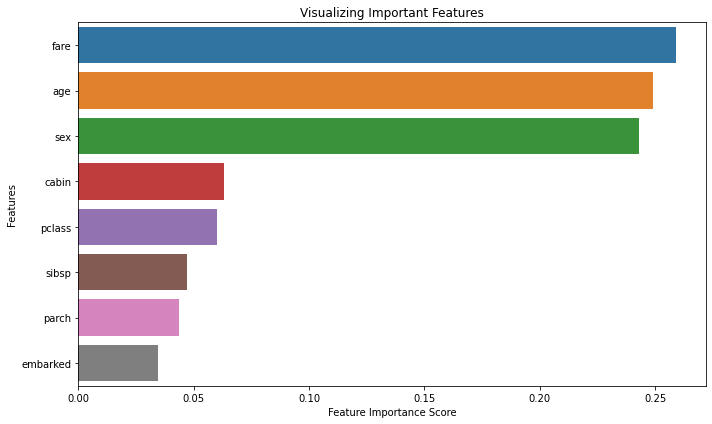

In [ ]:

feature_imp = pd.Series(modelRF_V1.feature_importances_, index= dfc.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

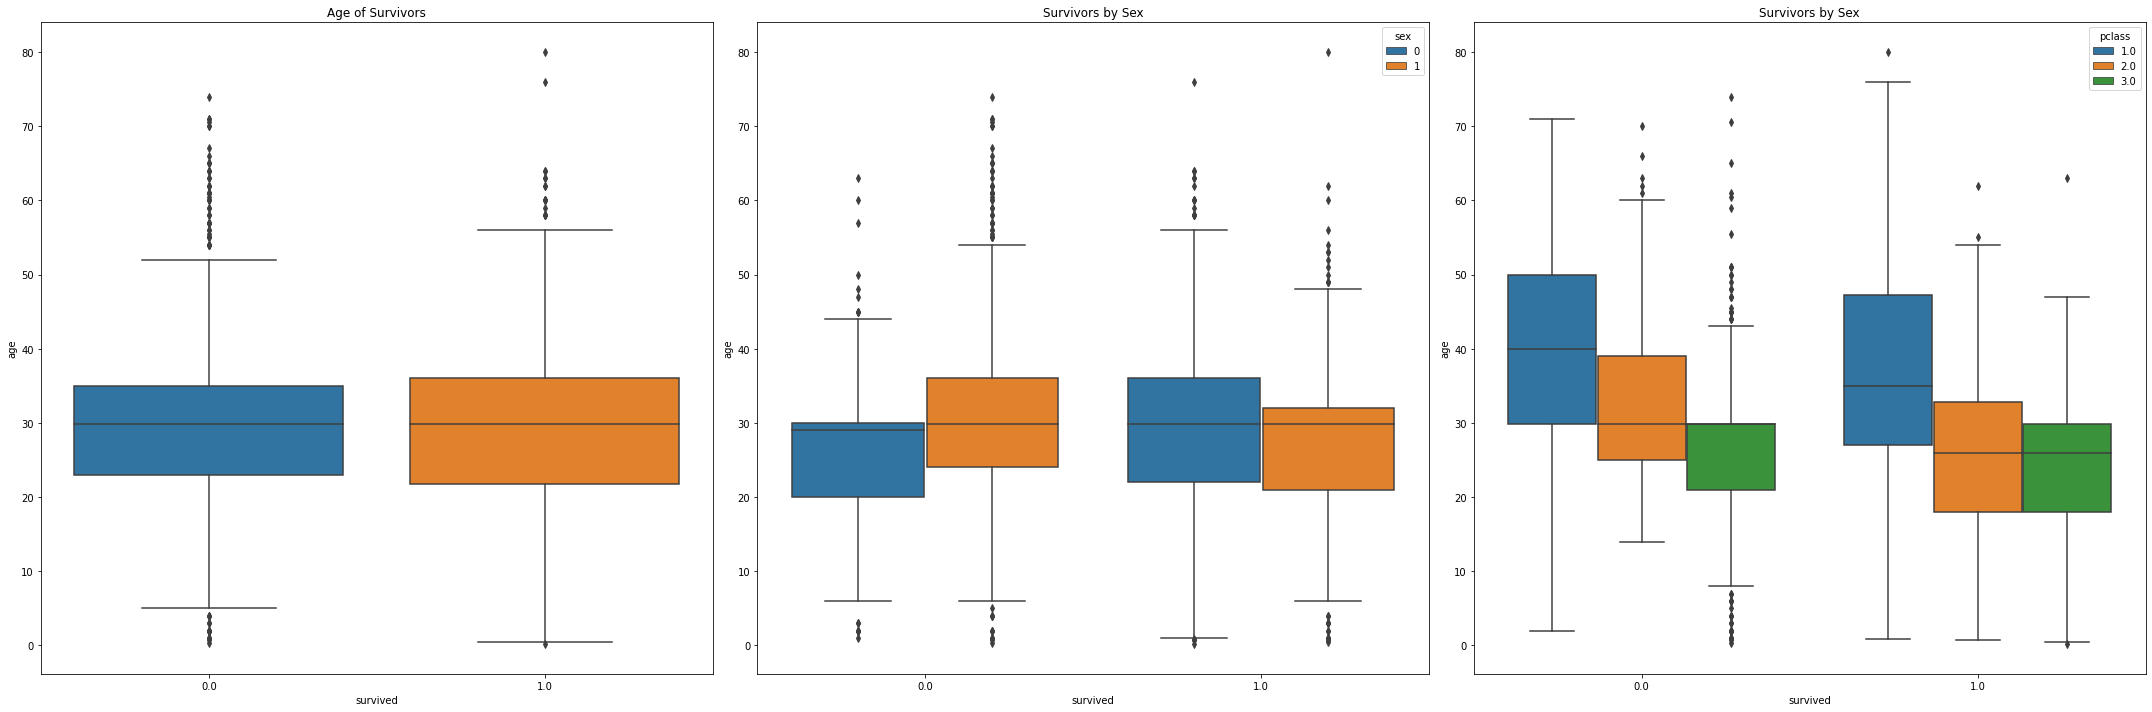

In [ ]:

fig, axx = plt.subplots(1, 3, figsize=(30,10))
axx[0].set_title('Age of Survivors')
sns.boxplot(x='survived', y='age', data=df, ax=axx[0])
axx[1].set_title('Survivors by Sex')
sns.boxplot(x='survived', y='age', hue='sex', data=df, ax=axx[1])
axx[2].set_title('Survivors by Sex')
sns.boxplot(x='survived', y='age', hue='pclass', data=df, ax=axx[2])
plt.tight_layout()

# Model RF V2 

In [ ]:
modelRF_V2 = RandomForestClassifier(n_estimators=100)
modelRF_V2.fit(predictors_norm , target_norm)

RandomForestClassifier()

In [ ]:
"""
param_grid = {
    'n_estimators': [50, 100, 500, 600],
    'max_depth': [None, 30, 50, 90],
    'min_samples_split': [2, 5, 10]
}
"""

param_grid = {
    'n_estimators': [50, 100, 500, 800],
    'max_depth': [None, 50, 90, 120],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(modelRF_V2, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(predictors_norm, target_norm)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 50, 90, 120],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 500, 800]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

# Use the best hyperparameters to create a new model
best_model = RandomForestClassifier(**best_params)

# Fit the new model to the training data
best_model.fit(predictors_norm, target_norm)

# Evaluate the new model on the test set
test_accuracy = best_model.score(predictors_test, target_test)

print(f'Test accuracy: {test_accuracy:.2f}')


Test accuracy: 0.77


In [ ]:
pred = modelRF_V2.predict(predictors_test)
print("   Accuracy: {}".format(metrics.accuracy_score(target_test, pred)))

   Accuracy: 0.7553956834532374


In [ ]:
pickle.dump(modelRF_V2 , open("/content/drive/MyDrive/Colab_models/Model_RF_V2_1D.pkl" , "wb"))

In [ ]:
loaded_model = pickle.load(open("/content/drive/MyDrive/Colab_models/Model_RF_V2_1D.pkl", "rb"))

In [ ]:
pred_loaded = loaded_model.predict(predictors_norm_test)
print("   Accuracy: {}".format(metrics.accuracy_score(target_norm_test, pred_loaded)))

   Accuracy: 0.8081534772182254


In [ ]:
def interpret_survived(arr):
  lst = []
  for i in arr:
    if i[0] == 1:
      lst.append(0)
    elif i[1] == 1:
      lst.append(1)
  return lst

In [ ]:
output = pd.DataFrame({"PassengerID" : df[892:]["PassengerId"], "Survived (Prediction)" : interpret_survived(pred), "Survived (Real)": df[892:]["survived"].values} )
output # Final result

,PassengerID,Survived (Prediction),Survived (Real)
610,611.0,0,0.0
110,111.0,0,0.0
55,56.0,1,1.0
1307,1308.0,0,0.0
689,690.0,0,0.0
...,...,...,...
972,973.0,1,0.0
531,532.0,0,0.0
393,394.0,0,0.0
0,1.0,1,1.0


# **Model V1**



In [ ]:
modelV1 = Sequential()
modelV1.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV1.add(Dense(32 , activation = "relu"))
modelV1.add(Dense(2 , activation = "softmax"))

## Attempt 1 

### Training (Attempt 1)

Training without validation data

In [ ]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
#model.fit(tf.convert_to_tensor(predictors, dtype=tf.int64)  , tf.convert_to_tensor(target, dtype=tf.int64) )
histV1_1 = modelV1.fit(predictors , target, epochs = 200)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 1.6370 - accuracy: 0.5404
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7290 - accuracy: 0.6379
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.6480
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6749
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6648
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6693
Epoch 7/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.6951
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7029
Epoch 9/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.6906
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 0.5748 - accuracy: 0.7063
Epoch 11/

### Test (Attempt 1)

In [ ]:
test_lost , test_accu = modelV1.evaluate(predictors_test , target_test)

14/14 [==============================] - 1s 3ms/step - loss: 0.5438 - accuracy: 0.7722


## Attempt 2

### Training (Attempt 2)

Training with Validation data

In [ ]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV1_2 = modelV1.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200)

Epoch 1/200
23/23 [==============================] - 1s 10ms/step - loss: 0.4044 - accuracy: 0.8205 - val_loss: 0.3933 - val_accuracy: 0.8212
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8233 - val_loss: 0.3875 - val_accuracy: 0.8324
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3782 - accuracy: 0.8303 - val_loss: 0.3953 - val_accuracy: 0.8156
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8121 - val_loss: 0.4299 - val_accuracy: 0.8156
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3852 - accuracy: 0.8149 - val_loss: 0.4067 - val_accuracy: 0.8212
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8275 - val_loss: 0.4170 - val_accuracy: 0.8212
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8275 - val_loss: 0.4025 - val_accuracy: 0.8212
Epoch 8/200


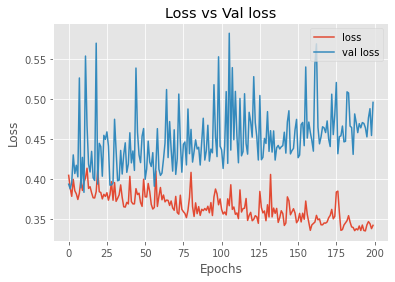

In [ ]:
hist_dict_model_1 = histV1_2.history
plot_loss(hist_dict_model_1)

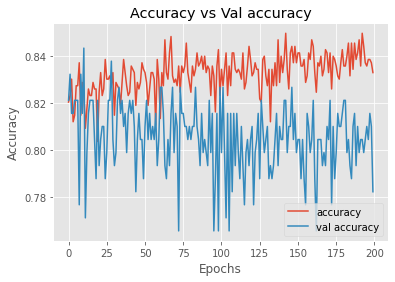

In [ ]:
plot_accu(hist_dict_model_1)

### Test (Attempt 2)

In [ ]:
test_loss , test_acc = modelV1.evaluate(predictors_test ,target_test)


14/14 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7674


## Attempt 3

### Training (Attempt 3)

Using normalized datasets

In [ ]:
print(len(predictors_norm_valid) + len(predictors_norm_train))

892


In [ ]:
print(len(predictors_norm_train))

713


In [ ]:
modelV1.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV1_3 = modelV1.fit(predictors_norm_train , target_norm_train  , validation_data = (predictors_norm_valid, target_norm_valid) , epochs = 200)

Epoch 1/200
23/23 [==============================] - 1s 10ms/step - loss: 40.8187 - accuracy: 0.3899 - val_loss: 31.9356 - val_accuracy: 0.4413
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 28.5968 - accuracy: 0.3899 - val_loss: 20.5618 - val_accuracy: 0.4413
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 16.4647 - accuracy: 0.3913 - val_loss: 9.8381 - val_accuracy: 0.4469
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 5.9929 - accuracy: 0.4180 - val_loss: 1.9132 - val_accuracy: 0.5196
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 1.2228 - accuracy: 0.6241 - val_loss: 1.3026 - val_accuracy: 0.5866
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 0.9649 - accuracy: 0.6550 - val_loss: 0.9805 - val_accuracy: 0.6480
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.7472 - accuracy: 0.7125 - val_loss: 0.7483 - val_accuracy: 0.6816
Epoch 8

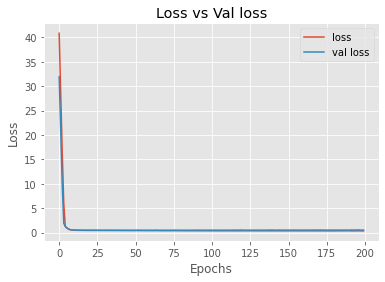

In [ ]:
hist_dict_model_3 = histV1_3.history
plot_loss(hist_dict_model_3)

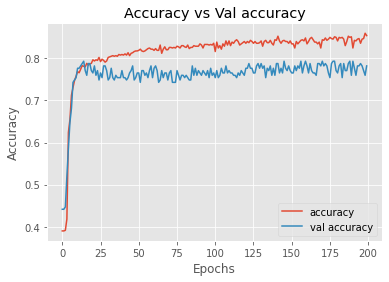

In [ ]:
plot_accu(hist_dict_model_3)

### Testing (Attempt 3)

In [ ]:
test_loss , test_acc = modelV1.evaluate(predictors_norm_test , target_norm_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7818


# **Model V2**

In [ ]:
modelV2 = Sequential()
modelV2.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV2.add(tf.keras.layers.Dropout(0.5))

modelV2.add(Dense(32 , activation = "relu"))
modelV2.add(tf.keras.layers.Dropout(0.5))

modelV2.add(Dense(2 , activation = "softmax"))


## Attempt 1 


### Training (Attempt 1)

Training with pure data

In [ ]:
modelV2.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV2_1 = modelV2.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 11ms/step - loss: 6.7361 - accuracy: 0.4123 - val_loss: 1.5168 - val_accuracy: 0.4525
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 4.3903 - accuracy: 0.5091 - val_loss: 1.0752 - val_accuracy: 0.6816
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 3.1732 - accuracy: 0.5596 - val_loss: 1.1906 - val_accuracy: 0.6927
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 2.7308 - accuracy: 0.5722 - val_loss: 1.1426 - val_accuracy: 0.6872
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 3.0679 - accuracy: 0.5498 - val_loss: 1.0004 - val_accuracy: 0.6872
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 2.3407 - accuracy: 0.5708 - val_loss: 0.8701 - val_accuracy: 0.6872
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 2.2211 - accuracy: 0.5652 - val_loss: 0.8045 - val_accuracy: 0.6536
Epoch 8/200


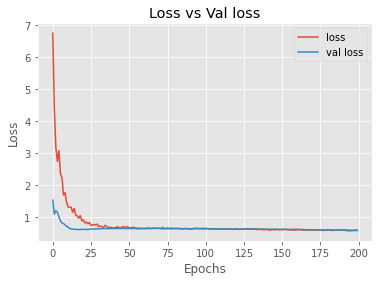

In [ ]:
dict_histV2_1 = histV2_1.history
plot_loss(dict_histV2_1)

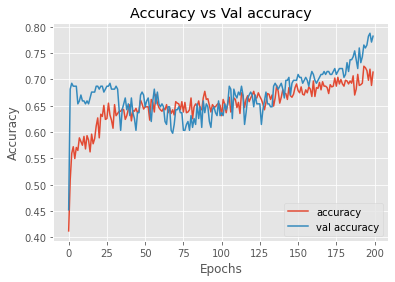

In [ ]:
plot_accu(dict_histV2_1)

### Testing (Attempt 1)

In [ ]:
test_loss , test_acc = modelV2.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7602


# Model V3

In [ ]:
modelV3 = Sequential()
modelV3.add(Dense(32, activation = "relu" , input_shape = (n_col ,)))
modelV3.add(BatchNormalization())
modelV3.add(tf.keras.layers.Dropout(0.5))

modelV3.add(Dense(32 , activation = "relu"))
modelV3.add(BatchNormalization())
modelV3.add(tf.keras.layers.Dropout(0.5))

modelV3.add(Dense(2 , activation = "softmax"))

## Attempt 1 

### Training (Attempt 1)

In [ ]:
modelV3.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV3_1 = modelV3.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 25ms/step - loss: 1.0850 - accuracy: 0.5245 - val_loss: 1.9712 - val_accuracy: 0.5587
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 0.9549 - accuracy: 0.5470 - val_loss: 1.0705 - val_accuracy: 0.5698
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.8958 - accuracy: 0.5736 - val_loss: 0.7841 - val_accuracy: 0.5810
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.7916 - accuracy: 0.6129 - val_loss: 0.6991 - val_accuracy: 0.6034
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.8427 - accuracy: 0.5835 - val_loss: 0.6698 - val_accuracy: 0.6257
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.8457 - accuracy: 0.6227 - val_loss: 0.6502 - val_accuracy: 0.6145
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.7434 - accuracy: 0.6255 - val_loss: 0.6359 - val_accuracy: 0.6313
Epoch 8/200


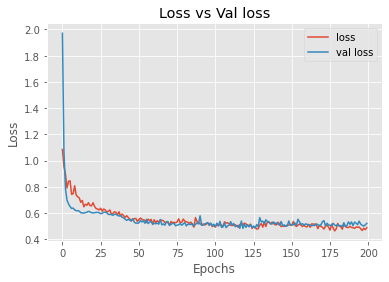

In [ ]:
dict_histV3_1 = histV3_1.history
plot_loss(dict_histV3_1)

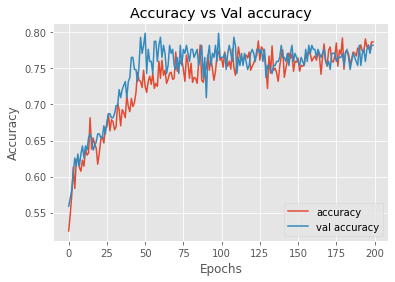

In [ ]:
plot_accu(dict_histV3_1)

### Testing (Attempt 1)

In [ ]:
test_loss , test_acc = modelV3.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7962


# Model V4 

In [ ]:
modelV4 = Sequential()
modelV4.add(Dense(32, activation = "relu" , input_shape = (n_col ,), kernel_regularizer='l1'))
modelV4.add(BatchNormalization())
modelV4.add(tf.keras.layers.Dropout(0.5))

modelV4.add(Dense(32 , activation = "relu"))
modelV4.add(BatchNormalization())
modelV4.add(tf.keras.layers.Dropout(0.5))

modelV4.add(Dense(2 , activation = "softmax"))

## Training 

In [ ]:
modelV4.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV4_1 = modelV4.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 1s 13ms/step - loss: 1.5045 - accuracy: 0.5694 - val_loss: 1.1965 - val_accuracy: 0.6927
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 1.4360 - accuracy: 0.5750 - val_loss: 1.1317 - val_accuracy: 0.6872
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 1.3558 - accuracy: 0.5750 - val_loss: 1.0679 - val_accuracy: 0.6816
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 1.2497 - accuracy: 0.5947 - val_loss: 1.0433 - val_accuracy: 0.6872
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 1.1609 - accuracy: 0.6073 - val_loss: 1.0043 - val_accuracy: 0.6872
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 1.1676 - accuracy: 0.6003 - val_loss: 0.9568 - val_accuracy: 0.6816
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 1.0754 - accuracy: 0.6297 - val_loss: 0.9202 - val_accuracy: 0.6927
Epoch 8/200


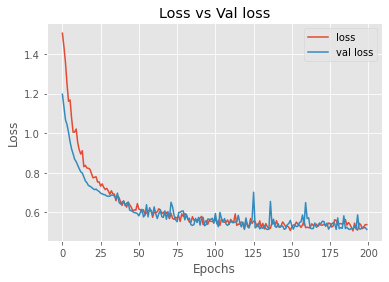

In [ ]:
dict_histV4_1 = histV4_1.history
plot_loss(dict_histV4_1)

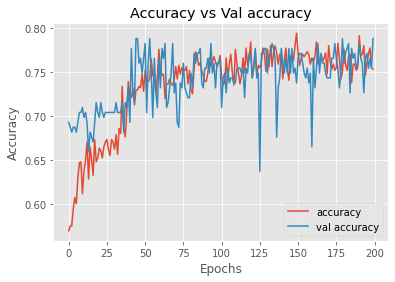

In [ ]:
plot_accu(dict_histV4_1)

## Testing

In [ ]:
test_loss , test_acc = modelV4.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7722


# Model V5 

In [ ]:
modelV5 = Sequential()
modelV5.add(Dense(16, activation = "relu" , input_shape = (n_col ,)))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))

modelV5.add(Dense(16 , activation = "relu"))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))

modelV5.add(Dense(16 , activation = "relu"))
modelV5.add(BatchNormalization())
modelV5.add(tf.keras.layers.Dropout(0.5))



modelV5.add(Dense(2 , activation = "softmax"))

## Attempt 1

### Training (Attempt 1)

In [ ]:
modelV5.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_1 = modelV5.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )

Epoch 1/200
23/23 [==============================] - 2s 14ms/step - loss: 1.1237 - accuracy: 0.5007 - val_loss: 0.6119 - val_accuracy: 0.6648
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 1.1297 - accuracy: 0.5035 - val_loss: 0.6138 - val_accuracy: 0.6648
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.9121 - accuracy: 0.5582 - val_loss: 0.6166 - val_accuracy: 0.6704
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.9683 - accuracy: 0.5316 - val_loss: 0.6194 - val_accuracy: 0.6536
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.9260 - accuracy: 0.5638 - val_loss: 0.6231 - val_accuracy: 0.6480
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.8875 - accuracy: 0.5933 - val_loss: 0.6284 - val_accuracy: 0.6313
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.8697 - accuracy: 0.5736 - val_loss: 0.6321 - val_accuracy: 0.6313
Epoch 8/200


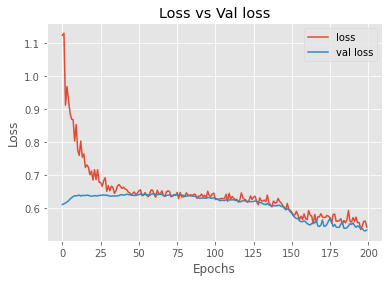

In [ ]:
dict_histV5_1 = histV5_1.history
plot_loss(dict_histV5_1)

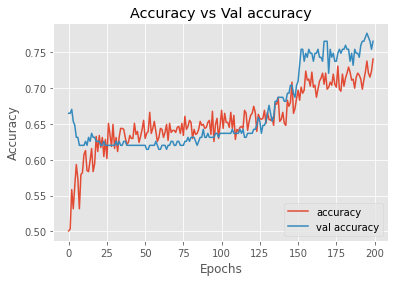

In [ ]:
plot_accu(dict_histV5_1)

### Testing (Attempt 1)

In [ ]:
test_loss , test_acc = modelV5.evaluate(predictors_test ,target_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.7986


## Attempt 2 

### Training (Attempt 2)

In [ ]:
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
modelV5.compile(optimizer = opt, loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_2 = modelV5.fit(predictors_train , target_train  , validation_data = (predictors_valid, target_valid) , epochs = 200 , verbose = 1 )


Epoch 1/200
23/23 [==============================] - 2s 13ms/step - loss: 0.5425 - accuracy: 0.7447 - val_loss: 0.5265 - val_accuracy: 0.7654
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5651 - accuracy: 0.7209 - val_loss: 0.5336 - val_accuracy: 0.7709
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7251 - val_loss: 0.5367 - val_accuracy: 0.7654
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5405 - accuracy: 0.7223 - val_loss: 0.5328 - val_accuracy: 0.7598
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5682 - accuracy: 0.7167 - val_loss: 0.5288 - val_accuracy: 0.7765
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5547 - accuracy: 0.7055 - val_loss: 0.5241 - val_accuracy: 0.7765
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5522 - accuracy: 0.7377 - val_loss: 0.5221 - val_accuracy: 0.7765
Epoch 8/200


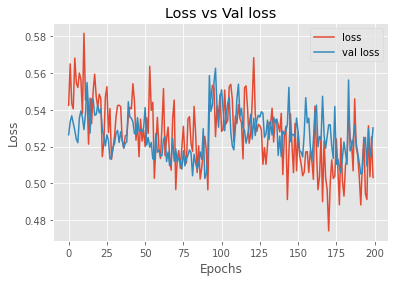

In [ ]:
dict_histV5_2 = histV5_2.history
plot_loss(dict_histV5_2)

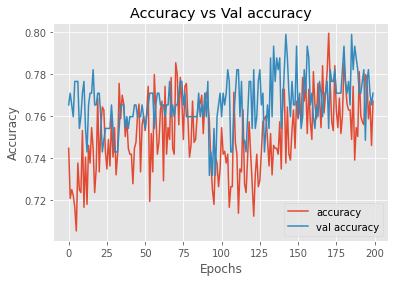

In [ ]:
plot_accu(dict_histV5_2)

###Testing (Attempt 2)

In [ ]:
test_loss , test_acc = modelV5.evaluate(predictors_test , target_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8225


In [ ]:
result = modelV5.predict(predictors_test)
print(type(result))
def predict_state(arr):
  lst = []
  for p in arr:
    if p[0] > 0.5:
      lst.append(0) # Died
    elif p[1] > 0.5:
      lst.append(1) # Survived
  return lst

14/14 [==============================] - 0s 2ms/step
<class 'numpy.ndarray'>


In [ ]:
output = pd.DataFrame({"PassengerID" : df[892:]["PassengerId"], "Survived (Prediction)" : predict_state(result), "Survived (Real)": df[892:]["survived"].values} )
output # Final result

,PassengerID,Survived (Prediction),Survived (Real)
136,137.0,0,1.0
676,677.0,0,0.0
240,241.0,0,1.0
570,571.0,1,1.0
503,504.0,0,1.0
...,...,...,...
530,531.0,0,0.0
990,991.0,0,0.0
1229,1230.0,0,0.0
378,379.0,0,0.0


In [ ]:
modelV5.save("/content/drive/MyDrive/Colab_models/modelV5_2_2D_cop1.h5") #V5 ,1st attempt, 1st download
output.to_csv("/content/drive/MyDrive/Data/output_V5_2_2D_cop1.csv" , index = False, encoding= "utf-8")

In [ ]:
output.to_csv("/content/drive/MyDrive/Data/output_V5_2_2D_cop1.csv" , index = False, encoding= "utf-8")

In [ ]:
len(predictors_test)

417

In [ ]:
target_test # Column 1 : Not Survived , Column 2 : Survived
# Note :  1 means True in each surviving state (Survive or die) 
#         2 means False in each surviving state (Survive or die) 

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## Attempt 3

### Training (Attempt 3)

with normalizaed data

In [ ]:
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
modelV5.compile(optimizer = opt, loss = "categorical_crossentropy" , metrics = ["accuracy"])
histV5_3 = modelV5.fit(predictors_norm_train , target_norm_train  , validation_data = (predictors_norm_valid, target_norm_valid) , epochs = 200 , verbose = 1 )


Epoch 1/200
23/23 [==============================] - 1s 14ms/step - loss: 0.5750 - accuracy: 0.7433 - val_loss: 0.8376 - val_accuracy: 0.4860
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5429 - accuracy: 0.7644 - val_loss: 0.6229 - val_accuracy: 0.6425
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7504 - val_loss: 0.5525 - val_accuracy: 0.7095
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5265 - accuracy: 0.7784 - val_loss: 0.5305 - val_accuracy: 0.7318
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7518 - val_loss: 0.5232 - val_accuracy: 0.7263
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5336 - accuracy: 0.7616 - val_loss: 0.5180 - val_accuracy: 0.7318
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.5074 - accuracy: 0.7700 - val_loss: 0.5160 - val_accuracy: 0.7263
Epoch 8/200


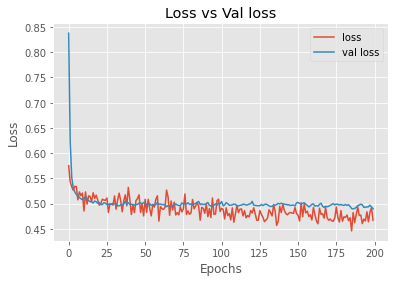

In [ ]:
dict_histV5_3 = histV5_3.history
plot_loss(dict_histV5_3)

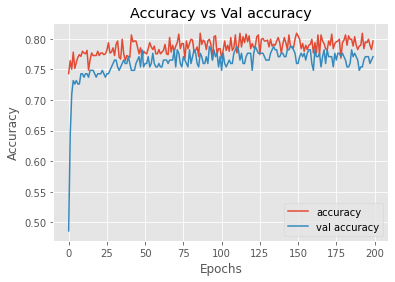

In [ ]:
plot_accu(dict_histV5_3)

### Testing (Attempt 3)

In [ ]:
test_loss , test_acc = modelV5.evaluate(predictors_norm_test , target_norm_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8201


In [ ]:
result = modelV5.predict(predictors_test)
output = pd.DataFrame({"PassengerID" : df[892:]["PassengerId"], "Survived (Prediction)" : predict_state(result), "Survived (Real)": df[892:]["survived"].values} )
output # Final result

14/14 [==============================] - 0s 2ms/step


,PassengerID,Survived (Prediction),Survived (Real)
136,137.0,0,1.0
676,677.0,0,0.0
240,241.0,0,1.0
570,571.0,0,1.0
503,504.0,0,1.0
...,...,...,...
530,531.0,0,0.0
990,991.0,0,0.0
1229,1230.0,0,0.0
378,379.0,0,0.0


In [ ]:
modelV5.save("/content/drive/MyDrive/Colab_models/modelV5_3_1D_cop1.h5") #V5 ,1st attempt, 1st download
output.to_csv("/content/drive/MyDrive/Data/output_V5_3_1D_cop1.csv" , index = False, encoding= "utf-8")